In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os
sys.path.append(os.path.abspath("../../shared"))
import eda
%matplotlib inline

## Read data and minor inspection

In [2]:
data = pd.read_csv('./creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


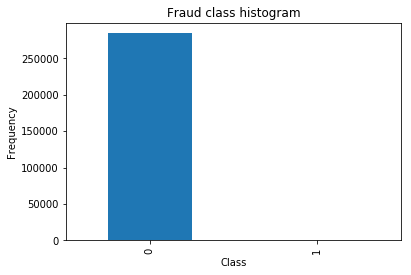

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index();
count_classes.plot(kind = 'bar');
plt.title("Fraud class histogram");
plt.xlabel("Class");
plt.ylabel("Frequency");

#### Source: https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
#### Goal of this notebook is to recreate the success of the above source notebook via the given resampling method, understand why it works, and to work through the code (specifically learn more about cross validation/model evaluation techniques)

In [5]:
pd.value_counts(data['Class'], sort = True)

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [8]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [9]:
# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

In [10]:
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [11]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [12]:
# Under sampled dataset
under_sample_data = data.iloc[under_sample_indices,:]

In [13]:
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

In [14]:
# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [15]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [16]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

/home/daniel/mlenv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives e.g. fraudulent transactions incorrectly classified
- So the goal will be to increase recall, even at a cost to precision since we don't mind if we have false positives (as long as its not too many)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,0.5,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        prec_accs = []
        accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            precision_acc = precision_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            acc = accuracy_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            prec_accs.append(precision_acc)
            accs.append(acc)
            print('Iteration ', iteration,': recall score = ', recall_acc, 'precision score: ', precision_acc, 'accuracy score: ', acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('   Mean recall score ', np.mean(recall_accs))
        print('Mean precision score ', np.mean(prec_accs))
        print(' Mean accuracy score ', np.mean(accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


In [19]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.972602739726 precision score:  0.71 accuracy score:  0.775362318841
Iteration  2 : recall score =  0.958904109589 precision score:  0.786516853933 accuracy score:  0.840579710145
Iteration  3 : recall score =  1.0 precision score:  0.634408602151 accuracy score:  0.753623188406
Iteration  4 : recall score =  0.972972972973 precision score:  0.685714285714 accuracy score:  0.744525547445
Iteration  5 : recall score =  0.984848484848 precision score:  0.722222222222 accuracy score:  0.810218978102

   Mean recall score  0.977865661427
Mean precision score  0.707772392804
 Mean accuracy score  0.784861948588

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493 precision score:  1.0 accuracy score:  0.920289855072
Iteration  2 : recall score =  0.86301

In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

In [23]:
print("Recall metric in the (undersampled) testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the (undersampled) testing dataset:  0.952380952381


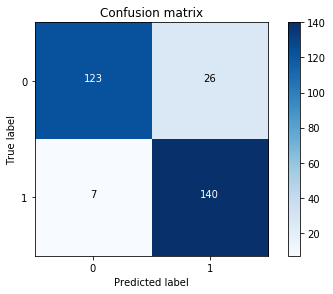

In [24]:
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [25]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

In [27]:
print("Recall metric in the entire testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the entire testing dataset:  0.945578231293


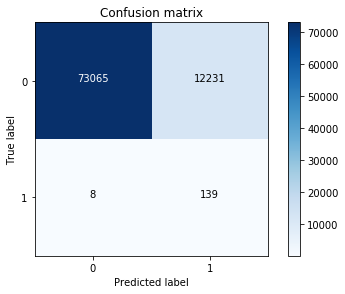

In [28]:
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [29]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

In [30]:
fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred_undersample_score)
roc_auc = auc(fpr,tpr)
# roc_auc_score(y_test_undersample,y_pred_undersample_score) # <-- Same as computing above auc(fpr, tpr)

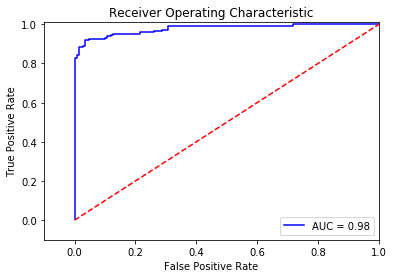

In [31]:
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Having tested our previous approach, I find really interesting to test the same process on the skewed data. Our intuition is that skewness will introduce issues difficult to capture, and therefore, provide a less effective algorithm.

In [32]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.492537313433 precision score:  0.80487804878 accuracy score:  0.998946655632
Iteration  2 : recall score =  0.602739726027 precision score:  0.916666666667 accuracy score:  0.999172372282
Iteration  3 : recall score =  0.683333333333 precision score:  0.82 accuracy score:  0.999297770421
Iteration  4 : recall score =  0.569230769231 precision score:  0.948717948718 accuracy score:  0.999247611165
Iteration  5 : recall score =  0.45 precision score:  0.878048780488 accuracy score:  0.998771067416

   Mean recall score  0.559568228405
Mean precision score  0.873662288931
 Mean accuracy score  0.999087095383

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.567164179104 precision score:  0.826086956522 accuracy score:  0.999072053771
Iteration  2 : recall score

In [33]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test) # <--- This is really the entire dataset, not an undersample

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

In [35]:
print("Recall metric on the entire testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# OR use recall_score(y_test, y_pred_undersample) from sklearn

Recall metric on the entire testing dataset:  0.619047619048


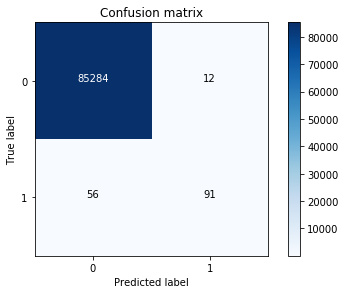

In [36]:
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Before continuing... changing classification threshold.
We have seen that by undersampling the data, our algorithm does a much better job at detecting fraud. I wanted also to show how can we tweak our final classification by changing the thresold.¶
- Initially, you build the classification model and then you predict unseen data using it.
- We previously used the "predict()" method to decided whether a record should belong to "1" or "0".
- There is another method "predict_proba()".
- This method returns the probabilities for each class. The idea is that by changing the threshold to assign a record to class 1, we - can control precision and recall.
#### Let's check this using the undersampled data (best C_param = 0.01)

   Recall:  1.0
Precision:  0.496621621622
   Recall:  1.0
Precision:  0.496621621622
   Recall:  1.0
Precision:  0.501706484642
   Recall:  0.993197278912
Precision:  0.618644067797
   Recall:  0.952380952381
Precision:  0.843373493976
   Recall:  0.918367346939
Precision:  0.964285714286
   Recall:  0.836734693878
Precision:  0.991935483871
   Recall:  0.755102040816
Precision:  1.0
   Recall:  0.591836734694
Precision:  1.0


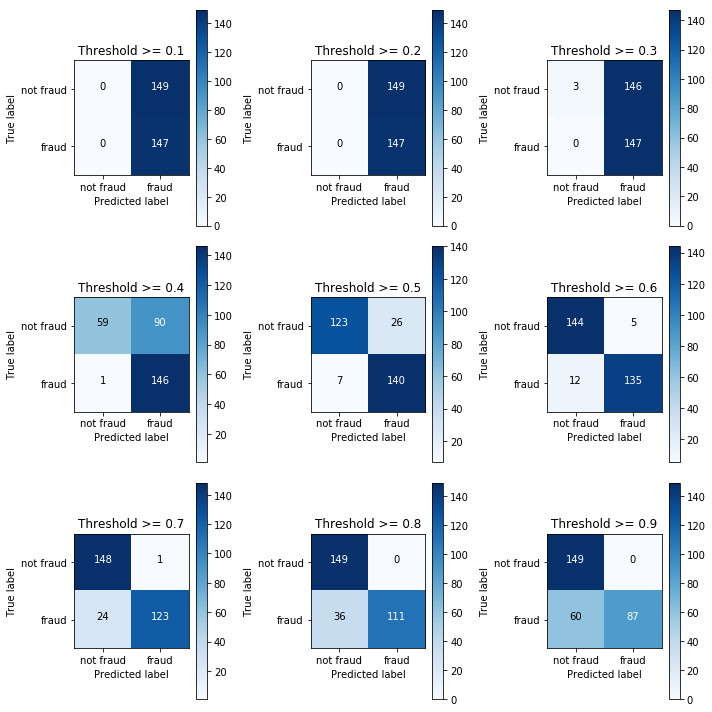

In [37]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
from sklearn.metrics import precision_score
plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    # tp / (tp + fn)
    print("   Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    # tp / (tp + fp)
    print("Precision: ", precision_score(y_test_undersample, y_test_predictions_high_recall))

    # Plot non-normalized confusion matrix
    class_names = ['not fraud','fraud']
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

"Nicely done. I was unfamiliar with logistic regression, and this helped me gain some insight into the process. One comment I would like to make on the accuracy vs recall. You spent most of your focus on recall and then mentioning that accuracy is important, but not really explaining why. A financial company wouldn't want to miss catching fraud FN which is why recall is important. However, you also have to consider lost accuracy (false positive) is lost money for the company as well, because they may have to call the customer and verify that the purchase was indeed authentic which takes resources. So, while the overall goal is to have perfect recall, I believe a bit more effort is needed in your notebook considering the tradeoff between the two. Is having C=.01 really best because it has the best recall, or is a slightly higher C value a better "sweet spot" that sacrifices little on recal, but greatly improves accuracy? Just a thought.

As a side note, I used KNN with weighted means and achieve around 91-92% percent recall on my test set using similar undersampling as you. It was interesting to see this perform slightly better on recall. I'll have to check how the two methods compare in accuracy." 

Quote from Brian on <a href="https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now#169984">Kaggle</a>

#### Let's implement Brian's idea and see if we can improve the accuracy with a high degree of recall

In [38]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.972602739726 precision score:  0.71 accuracy score:  0.775362318841
Iteration  2 : recall score =  0.958904109589 precision score:  0.786516853933 accuracy score:  0.840579710145
Iteration  3 : recall score =  1.0 precision score:  0.634408602151 accuracy score:  0.753623188406
Iteration  4 : recall score =  0.972972972973 precision score:  0.685714285714 accuracy score:  0.744525547445
Iteration  5 : recall score =  0.984848484848 precision score:  0.722222222222 accuracy score:  0.810218978102

   Mean recall score  0.977865661427
Mean precision score  0.707772392804
 Mean accuracy score  0.784861948588

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493 precision score:  1.0 accuracy score:  0.920289855072
Iteration  2 : recall score =  0.86301

#### Based on the modified "printing_Kfold_scores" function, the origininal best C parameter is very bad for precision. So assuming it is less costly to have 7% less recall (meaning we catch slightly less fradulent payments) and 28% more accuracy/precision (meaning we have a lot less false positives) , then then the best C parameter to choose would be 0.1